# 에코바이오 주식 & '수소' 검색트렌드
에코바이오는 수소차 대장주이다.  
카카오데이터

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'NanumGothic'

In [43]:
def get_price(company_code):
    url = "https://fchart.stock.naver.com/sise.nhn?symbol={}&timeframe=day&count=100&requestType=0".format(company_code)
    get_result = requests.get(url)
    bs_obj = BeautifulSoup(get_result.content, "html.parser")

    inf = bs_obj.select('item')
    columns = ['Date', 'Open' ,'High', 'Low', 'Close', 'Volume']
    df_inf = pd.DataFrame([], columns = columns, index = range(len(inf)))
    
    for i in range(len(inf)):
        df_inf.iloc[i] = str(inf[i]['data']).split('|')
    
    df_inf.index = pd.to_datetime(df_inf['Date'])
    
    return df_inf.drop('Date', axis=1).astype(float)

In [44]:
ecobio = get_price('038870')
ecobio

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-09,4050.0,4150.0,3865.0,3910.0,52324.0
2020-03-10,3750.0,3890.0,3700.0,3850.0,46950.0
2020-03-11,3850.0,3880.0,3520.0,3630.0,72968.0
2020-03-12,3600.0,3630.0,3315.0,3355.0,78999.0
2020-03-13,2970.0,3100.0,2740.0,2850.0,169684.0
...,...,...,...,...,...
2020-07-24,8570.0,8660.0,8290.0,8380.0,294286.0
2020-07-27,8400.0,9100.0,8400.0,8550.0,1206886.0
2020-07-28,8570.0,8710.0,8350.0,8380.0,344146.0


In [45]:
search = pd.read_csv('kakao_datatrend.csv', encoding='ANSI')
search.index = pd.to_datetime(search['일'], format='%Y%m%d')
search.drop('일', axis=1, inplace=True)
search

,수소
일,
2020-03-09,21
2020-03-10,14
2020-03-11,15
2020-03-12,15
2020-03-13,10
...,...
2020-07-25,18
2020-07-26,45
2020-07-27,34


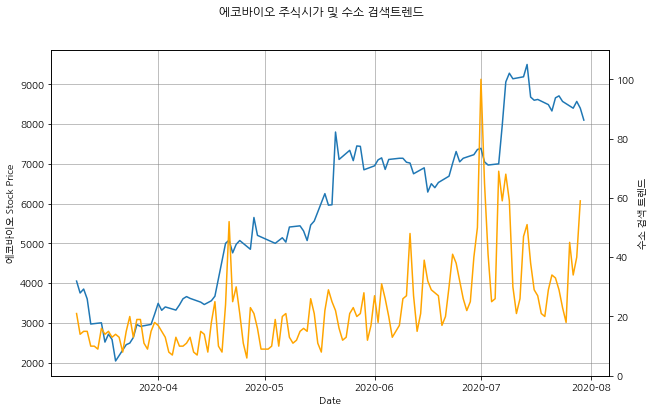

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
ax.grid(True, color='gray', linestyle='-', linewidth=0.5, axis='y', zorder=0)
ax.plot(ecobio.index, ecobio['Open'], zorder=2)
ax.grid(True)
ax.set_xlabel('Date')
ax.set_ylabel('에코바이오 Stock Price')

ax2 = ax.twinx()
ax2.plot(search.index, search['수소'], color='orange', zorder=2)
ax2.set_ylim([0, 110])
ax2.set_ylabel('수소 검색 트렌드')

fig.suptitle('에코바이오 주식시가 및 수소 검색트렌드')
plt.show()